In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Apply the style
plt.style.use('../xenonnt.mplstyle')


def earth_rotation_angles(t_hours, theta0, phi0, phi=-1.5743, theta=0.8966, omega=2*np.pi/24):
    """
    Compute angles between an inertial direction (theta0, phi0) and three local lab planes
    at Earth surface location (theta, phi) at time t_hours.

    Angles are returned in radians, always in [0, pi/2].

    Parameters
    ----------
    t_hours : float
        Time since t=0 in hours.
    theta0, phi0 : float
        Direction in inertial coordinates at t=0 (colatitude, longitude) in radians.
    theta, phi : float
        Lab location at t=0 (colatitude, longitude) in radians. Default to St. Louis, MO, USA.
    omega : float
        Earth's angular speed in rad/hour. Default = 2*pi/24.

    Returns
    -------
    alpha_h : float
        Angle between direction and horizontal plane (tangent plane).
    alpha_lon : float
        Angle between direction and vertical plane along longitude (meridian plane).
    alpha_lat : float
        Angle between direction and vertical plane along latitude (prime-vertical plane).
    """

    # Current lab longitude at time t
    Phi = phi + omega * t_hours

    # Relative longitude between direction and lab at time t
    delta_phi = phi0 - Phi

    # Dot products with plane normals
    d_r = np.sin(theta) * np.sin(theta0) * np.cos(delta_phi) + np.cos(theta) * np.cos(theta0)
    d_phi = np.sin(theta0) * np.sin(delta_phi)
    d_theta = np.cos(theta) * np.sin(theta0) * np.cos(delta_phi) - np.sin(theta) * np.cos(theta0)

    # Angles between direction and planes (using arcsin(|dot|))
    alpha_h   = np.arcsin(np.clip(np.abs(d_r),    0.0, 1.0))
    alpha_lon = np.arcsin(np.clip(np.abs(d_phi),  0.0, 1.0))
    alpha_lat = np.arcsin(np.clip(np.abs(d_theta),0.0, 1.0))

    return alpha_h, alpha_lon, alpha_lat


def normalized_rate(alpha, d=0.1):
    """
    Calculate normalized DM interaction rate.
    
    Parameters
    ----------
    alpha : float or array
        Angle between DM wind and detector plane in radians.
    d : float
        Directionality parameter (0 < d < 1).
    
    Returns
    -------
    float or array
        Normalized rate Γ(α) / Γ_max
    """
    return 1 - d - d * np.cos(alpha)


def plot_dm_rate_vs_time(d, theta0, phi0, t_max=24, n_points=1000):
    """
    Plot normalized DM interaction rate vs time for three planes.
    
    Parameters
    ----------
    d : float
        Directionality parameter (0 < d < 1).
    theta0, phi0 : float
        DM wind direction (colatitude, longitude) in radians.
    t_max : float, optional
        Maximum time in hours (default: 24).
    n_points : int, optional
        Number of time points (default: 1000).
    """
    # Compute time array
    t_hours = np.linspace(0, t_max, n_points)
    
    # Compute angles
    alpha_h, alpha_lon, alpha_lat = earth_rotation_angles(
        t_hours=t_hours, theta0=theta0, phi0=phi0
    )
    
    # Compute normalized rates
    rate_h = normalized_rate(alpha_h, d)
    rate_lon = normalized_rate(alpha_lon, d)
    rate_lat = normalized_rate(alpha_lat, d)
    
    # Create plot
    plt.plot(t_hours, rate_h, label='Horizontal')
    plt.plot(t_hours, rate_lon, label='Longitude')
    plt.plot(t_hours, rate_lat, label='Latitude')
    plt.legend(ncol=3, loc='best')
    plt.xlabel("Time [h]")
    plt.ylabel(r"$\Gamma\left(t\right) / \Gamma_{\max}$", 
               fontsize=10)
    plt.title(
        r"DM Wind: $\theta_0 = $" + f"{theta0:.2f}" + 
        r", $\phi_0 = $" + f"{phi0:.2f}; " + 
        r"$d = $" + f"{d:.2f}"
    )
    plt.xlim(0, t_max)
    plt.show()

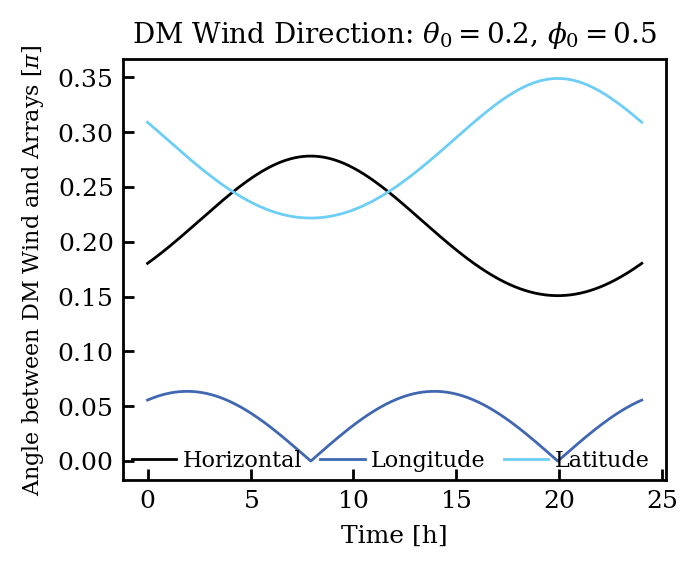

In [28]:
THETA0 = 0.2
PHI0 = 0.5
T_HOURS = np.linspace(0, 24, 1000)
alpha_hs, alpha_lons, alpha_lats = earth_rotation_angles(
    t_hours=T_HOURS, theta0=THETA0, phi0=PHI0
)

plt.plot(T_HOURS, alpha_hs/np.pi, label='Horizontal')
plt.plot(T_HOURS, alpha_lons/np.pi, label='Longitude')
plt.plot(T_HOURS, alpha_lats/np.pi, label='Latitude')
plt.legend(ncol=3, loc='best')
plt.xlabel("Time [h]")
plt.ylabel(r"Angle between DM Wind and Arrays [$\pi$]", 
           fontsize=8)
plt.title(r"DM Wind Direction: $\theta_0 = 0.2$, $\phi_0 = 0.5$")
plt.show()

$$
\begin{align}
\alpha_h(t)&=\arcsin \left(\left|\sin \theta \sin \theta_0 \cos \omega t+\cos \theta \cos \theta_0\right|\right)\\
\alpha_{\text {lon}}(t)&=\arcsin \left(\left|\sin \theta_0 \sin \omega t\right|\right)\\
\alpha_{\mathrm{lat}}(t)&=\arcsin \left(\left|\cos \theta \sin \theta_0 \cos \omega t-\sin \theta \cos \theta_0\right|\right)
\end{align}
$$

From QROCODILE SM Fig. S1 (bottom): $\Gamma\left(\mathbf{v}_{\mathrm{DM}}\right) / \Gamma_{\max }$ can be approximated as a 

$$
\Gamma\left(\alpha\right) / \Gamma_{\max} = 1 - d - d\cdot\mathrm{cos}\alpha
$$
where $d$ is the intensity of directionality signal, a dimensionless constant in $(0,1)$

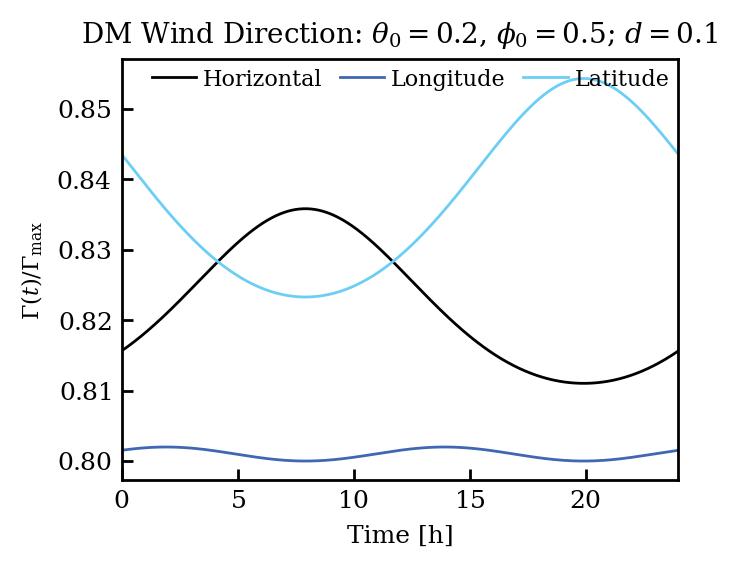

In [30]:
def normalized_rate(alpha, d=0.1):
    return 1 - d - d * np.cos(alpha)

D = 0.1
n_rate_hs = normalized_rate(alpha_hs, D)
n_rate_lons = normalized_rate(alpha_lons, D)
n_rate_lats = normalized_rate(alpha_lats, D)
plt.plot(T_HOURS, n_rate_hs, label='Horizontal')
plt.plot(T_HOURS, n_rate_lons, label='Longitude')
plt.plot(T_HOURS, n_rate_lats, label='Latitude')
plt.legend(ncol=3, loc='best')
plt.xlabel("Time [h]")
plt.ylabel(r"$\Gamma\left(t\right) / \Gamma_{\max}$", fontsize=8)
plt.title(r"DM Wind Direction: $\theta_0 = 0.2$, $\phi_0 = 0.5$; $d = 0.1$")
plt.xlim(0, 24)
plt.show()

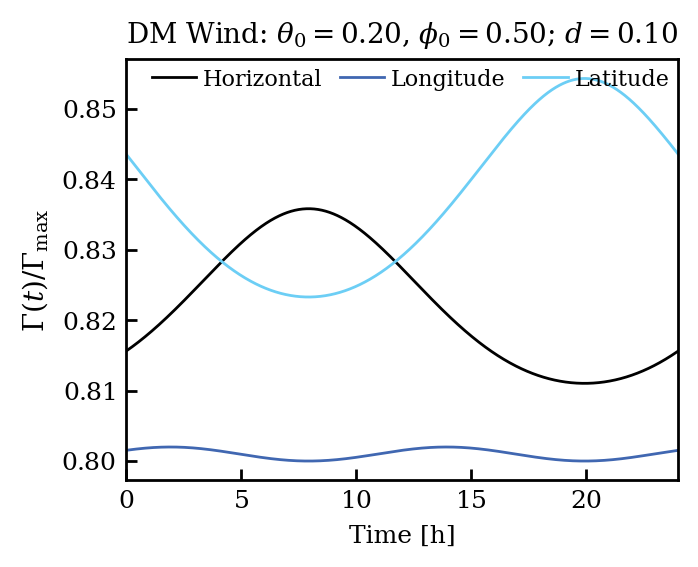

In [ ]:
plot_dm_rate_vs_time(d=0.1, theta0=0.2, phi0=0.5)

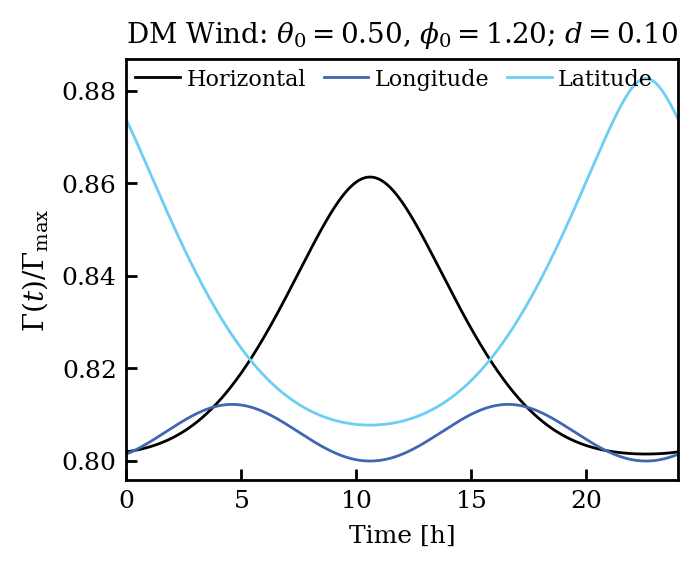

In [34]:
plot_dm_rate_vs_time(d=0.1, theta0=0.5, phi0=1.2)